<a href="https://colab.research.google.com/github/ritujab/GPS-Coordinates-trajectory-clustering/blob/main/GPS_Coordinates_Trajectory_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving TrajectoryClusteringDataset.csv to TrajectoryClusteringDataset (1).csv
Latitude     0
Longitude    0
Distance     0
dtype: int64
[[ 3.77732200e+01 -1.22417620e+02  2.43738982e-01]
 [ 3.77717833e+01 -1.22416183e+02  4.47379105e-01]
 [ 3.77744250e+01 -1.22418875e+02  7.01711183e-02]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


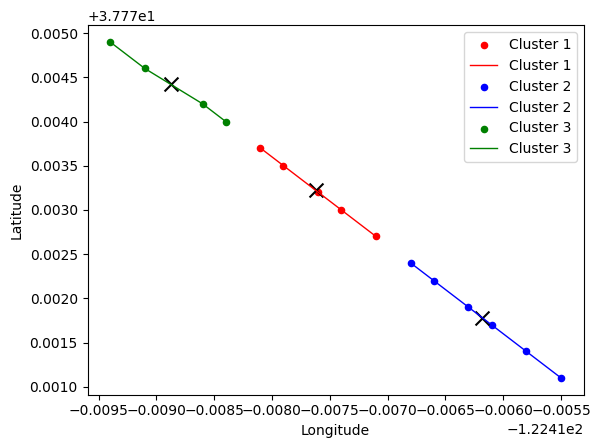

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import io
import pandas as pd
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt

# Load the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['TrajectoryClusteringDataset.csv']), skiprows=1, names=['Trajectory ID', 'Latitude', 'Longitude', 'Timestamp'], dtype={'Trajectory ID': 'Int64', 'Latitude': 'float64', 'Longitude': 'float64', 'Timestamp': 'object'})

# Function to calculate the distance between two points given their latitude and longitude
def haversine(lat1, lon1, lat2, lon2):
    R = 6372.8  # Earth radius in kilometers
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    return R * c

# Reference point
ref_lat = 37.7749
ref_lon = -122.4194

# Convert latitude-longitude pairs into numerical features
df['Distance'] = df.apply(lambda row: haversine(ref_lat, ref_lon, row['Latitude'], row['Longitude']), axis=1)

# Drop unnecessary columns
df.drop(['Timestamp', 'Trajectory ID'], axis=1, inplace=True)

# Check for missing values
print(df.isnull().sum())

# Fill in missing values with 0
df = df.fillna(0)

# Drop rows with missing values
df = df.dropna()

# Fit KMeans model with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

# Print the cluster centers
print(kmeans.cluster_centers_)

# Add the cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_ +1

# Plot the clusters
colors = ['red', 'blue', 'green']
for i in range(3):
    cluster_df = df[df['Cluster'] == i+1]
    plt.scatter(cluster_df['Longitude'], cluster_df['Latitude'], c=colors[i], label=f'Cluster {i+1}', s=20)
    plt.plot(cluster_df['Longitude'], cluster_df['Latitude'], c=colors[i], label=f'Cluster {i+1}', linewidth=1)

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], color='black', s=100, marker='x')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()
